In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

# Loading the data into the data frame.

In [3]:
df = pd.read_csv("rumah_olx_new.csv")
df.head()

,Product Name,kamar_tidur,kamar_mandi,luas,kecamatan,kota,harga
0,RUMAH MINIMALIS STRATEGIS BANJARMASIN,2,2,70,Banjarmasin Timur,Banjarmasin,400000000
1,Rumah baru dibangun,2,1,60,Banjarmasin Timur,Banjarmasin,400000000
2,SOLD OUT (TERJUAL),2,1,120,Banjarmasin Utara,Banjarmasin,550000000
3,DI JUAL CEPAT RUMAH PRIBADI MURAH Di BAWAH PAS...,3,2,100,Banjarmasin Utara,Banjarmasin,555000000
4,RUMAH MINIMALIS type 45,2,1,45,Banjarmasin Timur,Banjarmasin,400000000


In [4]:
df.tail()

,Product Name,kamar_tidur,kamar_mandi,luas,kecamatan,kota,harga
443,Dijual cepat Tanah dan Bangunan,2,1,182,Landasan Ulin,Banjarbaru,230000000
444,Rumah mewah murah type 650/1.200m2 samping mus...,5,5,650,Banjar Baru Selatan,Banjarbaru,3000000000
445,Dijual Cepat rumah milik pribadi,6,2,160,Landasan Ulin,Banjarbaru,950000000
446,Di jual rumah type 45,2,1,45,Banjar Baru Utara,Banjarbaru,350000000
447,"Jual Rumah Banjarbaru Loktabat Utara, LT10x19",2,1,150,Banjar Baru Utara,Banjarbaru,400000000


# Checking the types of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  448 non-null    object
 1   kamar_tidur   448 non-null    int64 
 2   kamar_mandi   448 non-null    int64 
 3   luas          448 non-null    int64 
 4   kecamatan     448 non-null    object
 5   kota          448 non-null    object
 6   harga         448 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 24.6+ KB


# Dropping irrelevant columns

In [6]:
df = df.drop(columns=['Product Name'])

In [7]:
df.head()

,kamar_tidur,kamar_mandi,luas,kecamatan,kota,harga
0,2,2,70,Banjarmasin Timur,Banjarmasin,400000000
1,2,1,60,Banjarmasin Timur,Banjarmasin,400000000
2,2,1,120,Banjarmasin Utara,Banjarmasin,550000000
3,3,2,100,Banjarmasin Utara,Banjarmasin,555000000
4,2,1,45,Banjarmasin Timur,Banjarmasin,400000000


# Dropping the duplicate rows

In [8]:
df.shape

(448, 6)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (9, 6)


In [10]:
df.count()

kamar_tidur    448
kamar_mandi    448
luas           448
kecamatan      448
kota           448
harga          448
dtype: int64

In [11]:
df = df.drop_duplicates()

In [12]:
df.count()

kamar_tidur    439
kamar_mandi    439
luas           439
kecamatan      439
kota           439
harga          439
dtype: int64

# Dropping the missing or null values

In [13]:
print(df.isnull().sum())

kamar_tidur    0
kamar_mandi    0
luas           0
kecamatan      0
kota           0
harga          0
dtype: int64


# Dropping kecamatan who only has one sample

In [14]:
drop = ['Tamban Catur', 'Kapuas Kuala', 'Bati-Bati', 'Cempaka', 'Tambang Ulang']

df = df[~df['kecamatan'].isin(drop)]

df

,kamar_tidur,kamar_mandi,luas,kecamatan,kota,harga
0,2,2,70,Banjarmasin Timur,Banjarmasin,400000000
1,2,1,60,Banjarmasin Timur,Banjarmasin,400000000
2,2,1,120,Banjarmasin Utara,Banjarmasin,550000000
3,3,2,100,Banjarmasin Utara,Banjarmasin,555000000
4,2,1,45,Banjarmasin Timur,Banjarmasin,400000000
...,...,...,...,...,...,...
443,2,1,182,Landasan Ulin,Banjarbaru,230000000
444,5,5,650,Banjar Baru Selatan,Banjarbaru,3000000000
445,6,2,160,Landasan Ulin,Banjarbaru,950000000
446,2,1,45,Banjar Baru Utara,Banjarbaru,350000000


# Changing some column values

In [15]:
df.loc[df['kecamatan'] == 'Banjarmasin Kota', 'kecamatan'] = 'Banjarmasin Timur'

df

,kamar_tidur,kamar_mandi,luas,kecamatan,kota,harga
0,2,2,70,Banjarmasin Timur,Banjarmasin,400000000
1,2,1,60,Banjarmasin Timur,Banjarmasin,400000000
2,2,1,120,Banjarmasin Utara,Banjarmasin,550000000
3,3,2,100,Banjarmasin Utara,Banjarmasin,555000000
4,2,1,45,Banjarmasin Timur,Banjarmasin,400000000
...,...,...,...,...,...,...
443,2,1,182,Landasan Ulin,Banjarbaru,230000000
444,5,5,650,Banjar Baru Selatan,Banjarbaru,3000000000
445,6,2,160,Landasan Ulin,Banjarbaru,950000000
446,2,1,45,Banjar Baru Utara,Banjarbaru,350000000


# Detecting Outliers

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='kamar_tidur'>

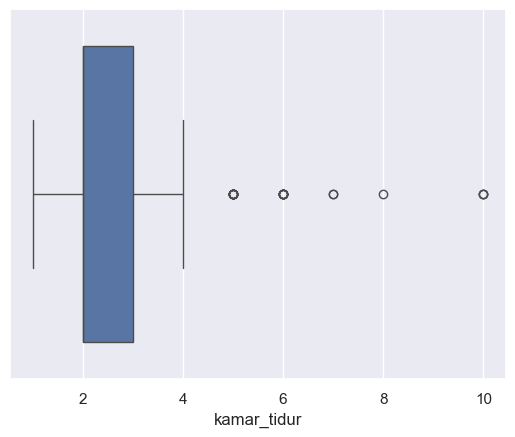

In [16]:
sns.boxplot(x=df['kamar_tidur'])

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='kamar_mandi'>

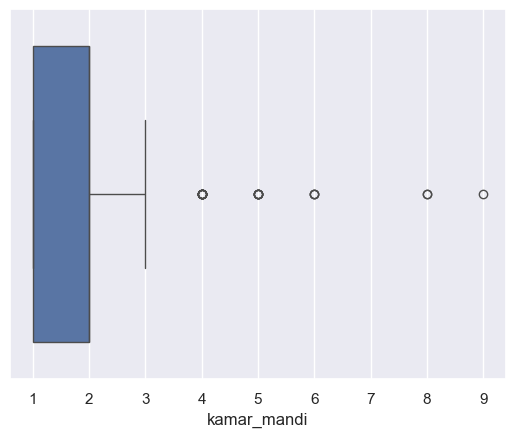

In [17]:
sns.boxplot(x=df['kamar_mandi'])

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='luas'>

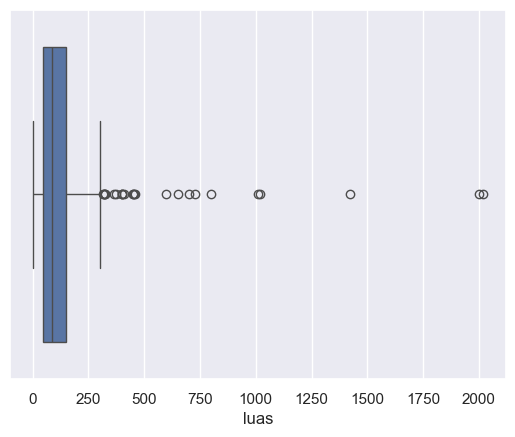

In [18]:
sns.boxplot(x=df['luas'])

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='harga'>

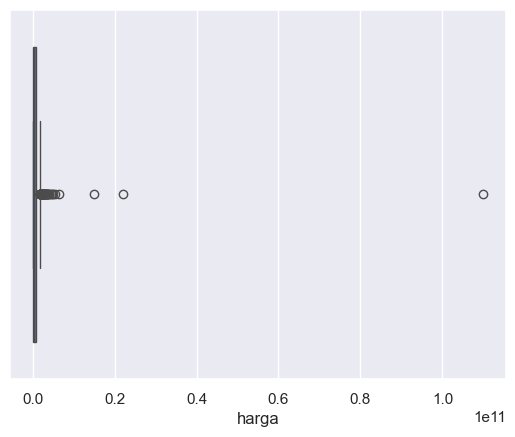

In [19]:
sns.boxplot(x=df['harga'])

In [20]:
df = df.reset_index(drop=True)

In [21]:
df

,kamar_tidur,kamar_mandi,luas,kecamatan,kota,harga
0,2,2,70,Banjarmasin Timur,Banjarmasin,400000000
1,2,1,60,Banjarmasin Timur,Banjarmasin,400000000
2,2,1,120,Banjarmasin Utara,Banjarmasin,550000000
3,3,2,100,Banjarmasin Utara,Banjarmasin,555000000
4,2,1,45,Banjarmasin Timur,Banjarmasin,400000000
...,...,...,...,...,...,...
428,2,1,182,Landasan Ulin,Banjarbaru,230000000
429,5,5,650,Banjar Baru Selatan,Banjarbaru,3000000000
430,6,2,160,Landasan Ulin,Banjarbaru,950000000
431,2,1,45,Banjar Baru Utara,Banjarbaru,350000000


In [22]:
# Assume df is your original DataFrame
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on the IQR
filtered_df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the filtered DataFrame
filtered_df.shape


(354, 6)

Q1 = df.select_dtypes(include='number').quantile(0.25)
Q3 = df.select_dtypes(include='number').quantile(0.75)
IQR = Q3 - Q1
print(IQR)

new = df.drop(columns=['kecamatan', 'kota'])
new

new = new[~((new<(Q1-1.5*IQR))|(new>(Q3+1.5*IQR))).any(axis=1)]
new.shape

test = df[~((new<(Q1-1.5*IQR))|(new>(Q3+1.5*IQR))).any(axis=1)]
test.shape

In [23]:
filtered_df

,kamar_tidur,kamar_mandi,luas,kecamatan,kota,harga
0,2,2,70,Banjarmasin Timur,Banjarmasin,400000000
1,2,1,60,Banjarmasin Timur,Banjarmasin,400000000
2,2,1,120,Banjarmasin Utara,Banjarmasin,550000000
3,3,2,100,Banjarmasin Utara,Banjarmasin,555000000
4,2,1,45,Banjarmasin Timur,Banjarmasin,400000000
...,...,...,...,...,...,...
425,2,1,36,Landasan Ulin,Banjarbaru,160000000
426,2,1,36,Landasan Ulin,Banjarbaru,190000000
428,2,1,182,Landasan Ulin,Banjarbaru,230000000
431,2,1,45,Banjar Baru Utara,Banjarbaru,350000000


In [24]:
filtered_df = filtered_df.reset_index(drop=True)

In [25]:
filtered_df

,kamar_tidur,kamar_mandi,luas,kecamatan,kota,harga
0,2,2,70,Banjarmasin Timur,Banjarmasin,400000000
1,2,1,60,Banjarmasin Timur,Banjarmasin,400000000
2,2,1,120,Banjarmasin Utara,Banjarmasin,550000000
3,3,2,100,Banjarmasin Utara,Banjarmasin,555000000
4,2,1,45,Banjarmasin Timur,Banjarmasin,400000000
...,...,...,...,...,...,...
349,2,1,36,Landasan Ulin,Banjarbaru,160000000
350,2,1,36,Landasan Ulin,Banjarbaru,190000000
351,2,1,182,Landasan Ulin,Banjarbaru,230000000
352,2,1,45,Banjar Baru Utara,Banjarbaru,350000000


# Visualization

## Histogram

Text(0.5, 0, 'Kecamatan')

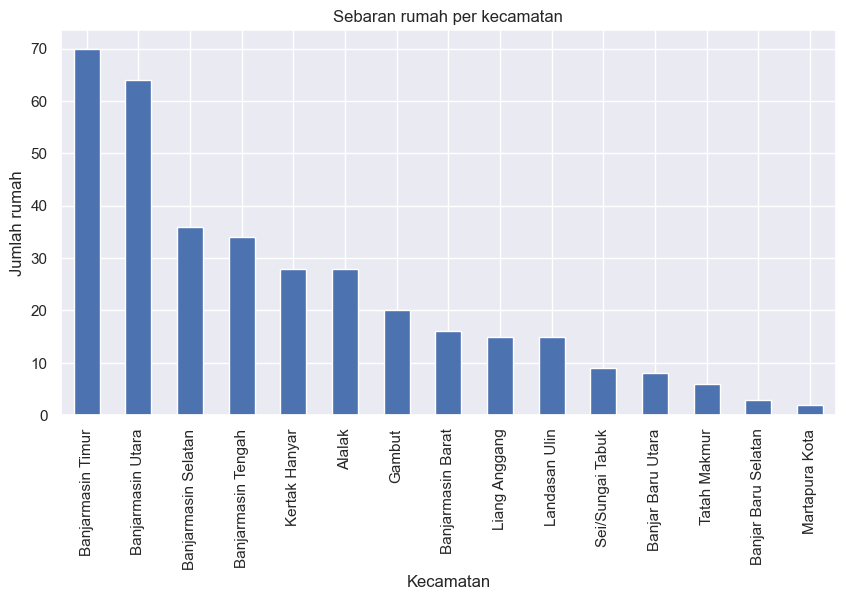

In [37]:
filtered_df.kecamatan.value_counts().nlargest(30).plot(kind='bar', figsize=(10,5))
plt.title("Sebaran rumah per kecamatan")
plt.ylabel('Jumlah rumah')
plt.xlabel('Kecamatan')

In [39]:
filtered_df['kecamatan'].value_counts()

kecamatan
Banjarmasin Timur      70
Banjarmasin Utara      64
Banjarmasin Selatan    36
Banjarmasin Tengah     34
Kertak Hanyar          28
Alalak                 28
Gambut                 20
Banjarmasin Barat      16
Liang Anggang          15
Landasan Ulin          15
Sei/Sungai Tabuk        9
Banjar Baru Utara       8
Tatah Makmur            6
Banjar Baru Selatan     3
Martapura Kota          2
Name: count, dtype: int64

In [40]:
filtered_df['kota'].value_counts()

kota
Banjarmasin    216
Banjar          65
Banjarbaru      41
Barito          28
Kalimantan       4
Name: count, dtype: int64

## Heat Maps

,kamar_tidur,kamar_mandi,luas,harga
kamar_tidur,1.000000,0.620567,0.280412,0.062915
kamar_mandi,0.620567,1.000000,0.429917,0.048642
luas,0.280412,0.429917,1.000000,0.067801
harga,0.062915,0.048642,0.067801,1.000000


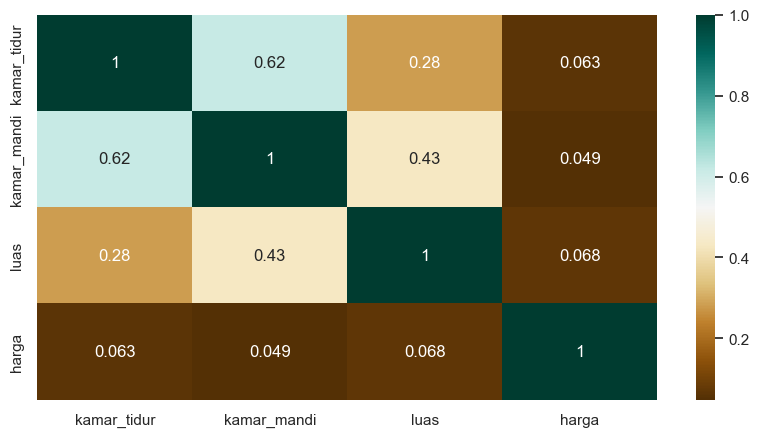

In [28]:
plt.figure(figsize=(10,5))
c= numeric_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Scatterplot

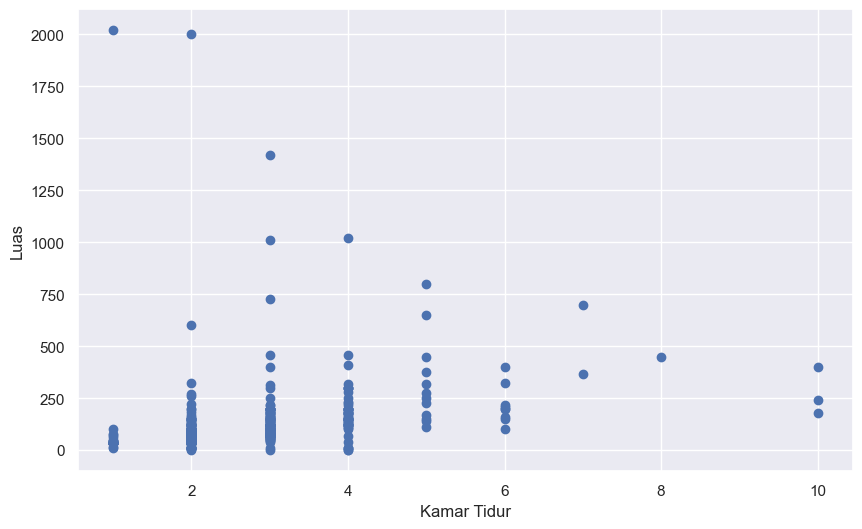

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['kamar_tidur'], df['luas'])
ax.set_xlabel('Kamar Tidur')
ax.set_ylabel('Luas')
plt.show()

In [30]:
#filtered_df.to_csv("bismillah.csv", index=False)

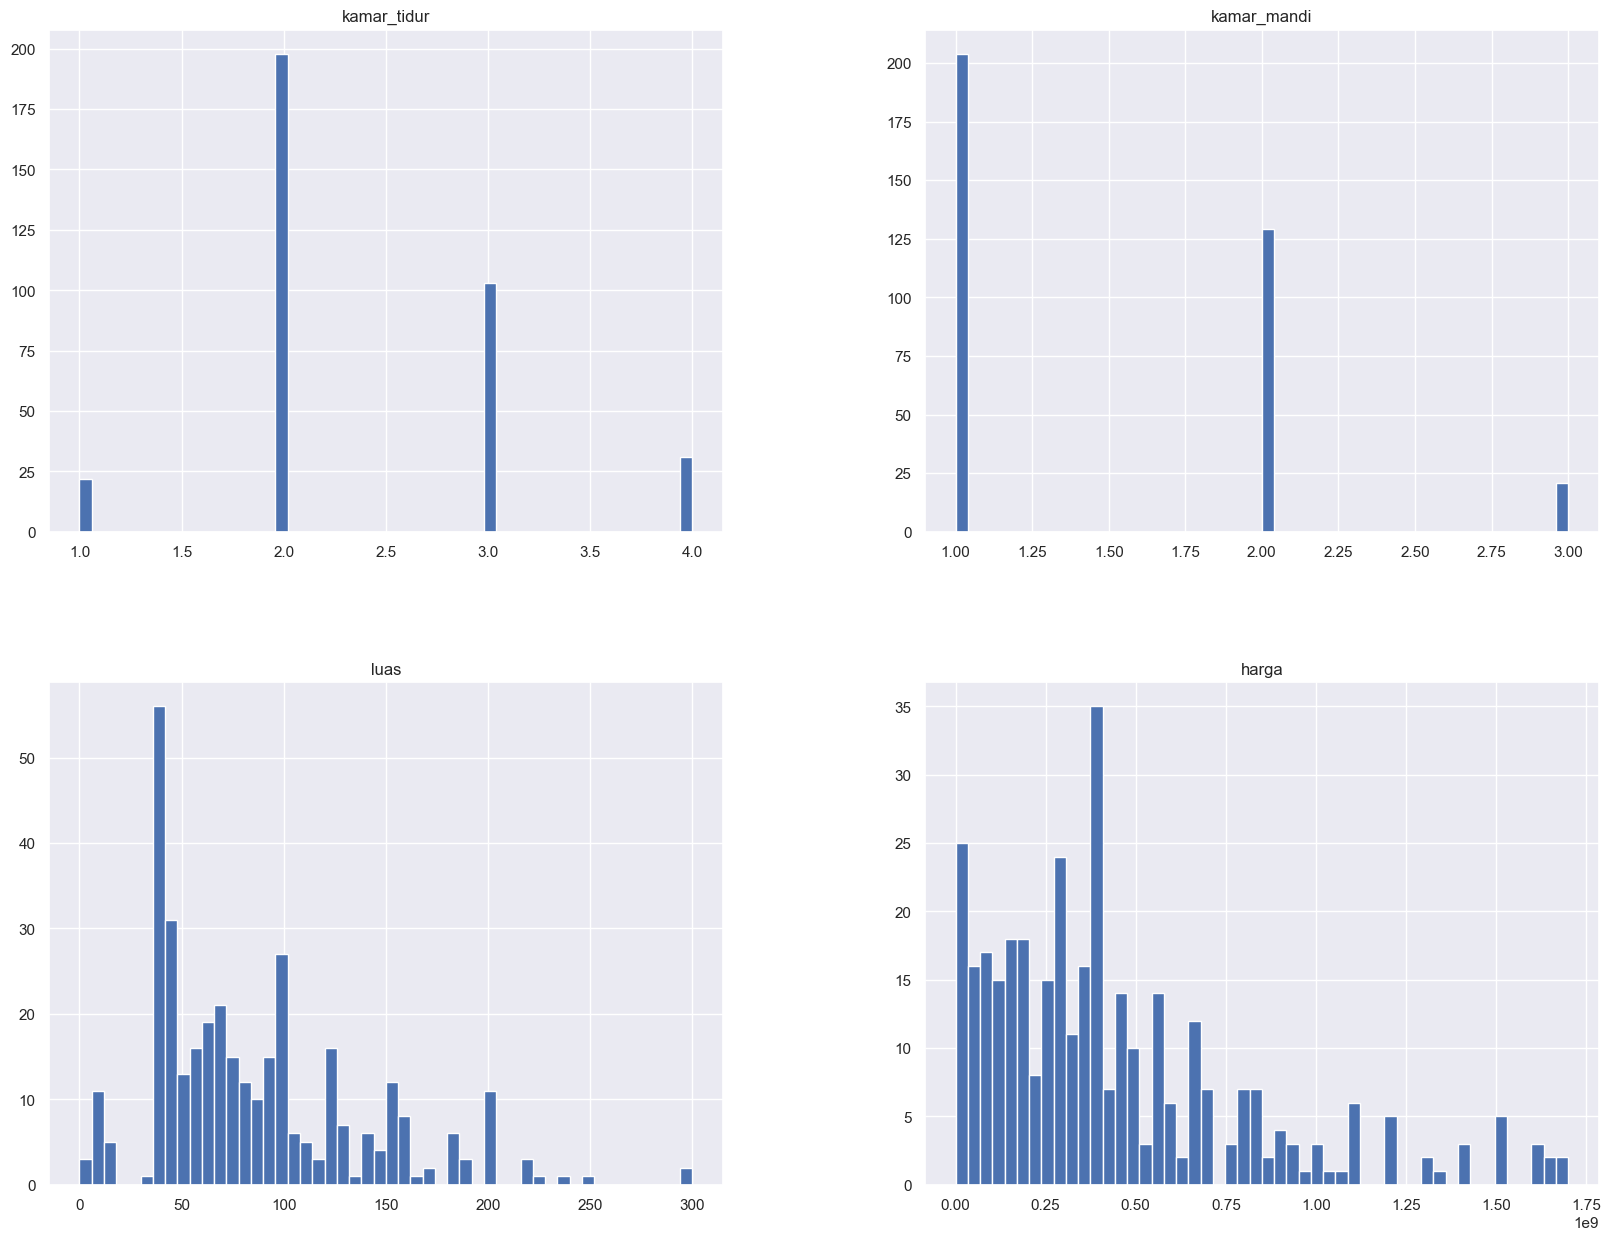

In [31]:
filtered_df.hist(bins=50, figsize=(20, 15))
plt.show()

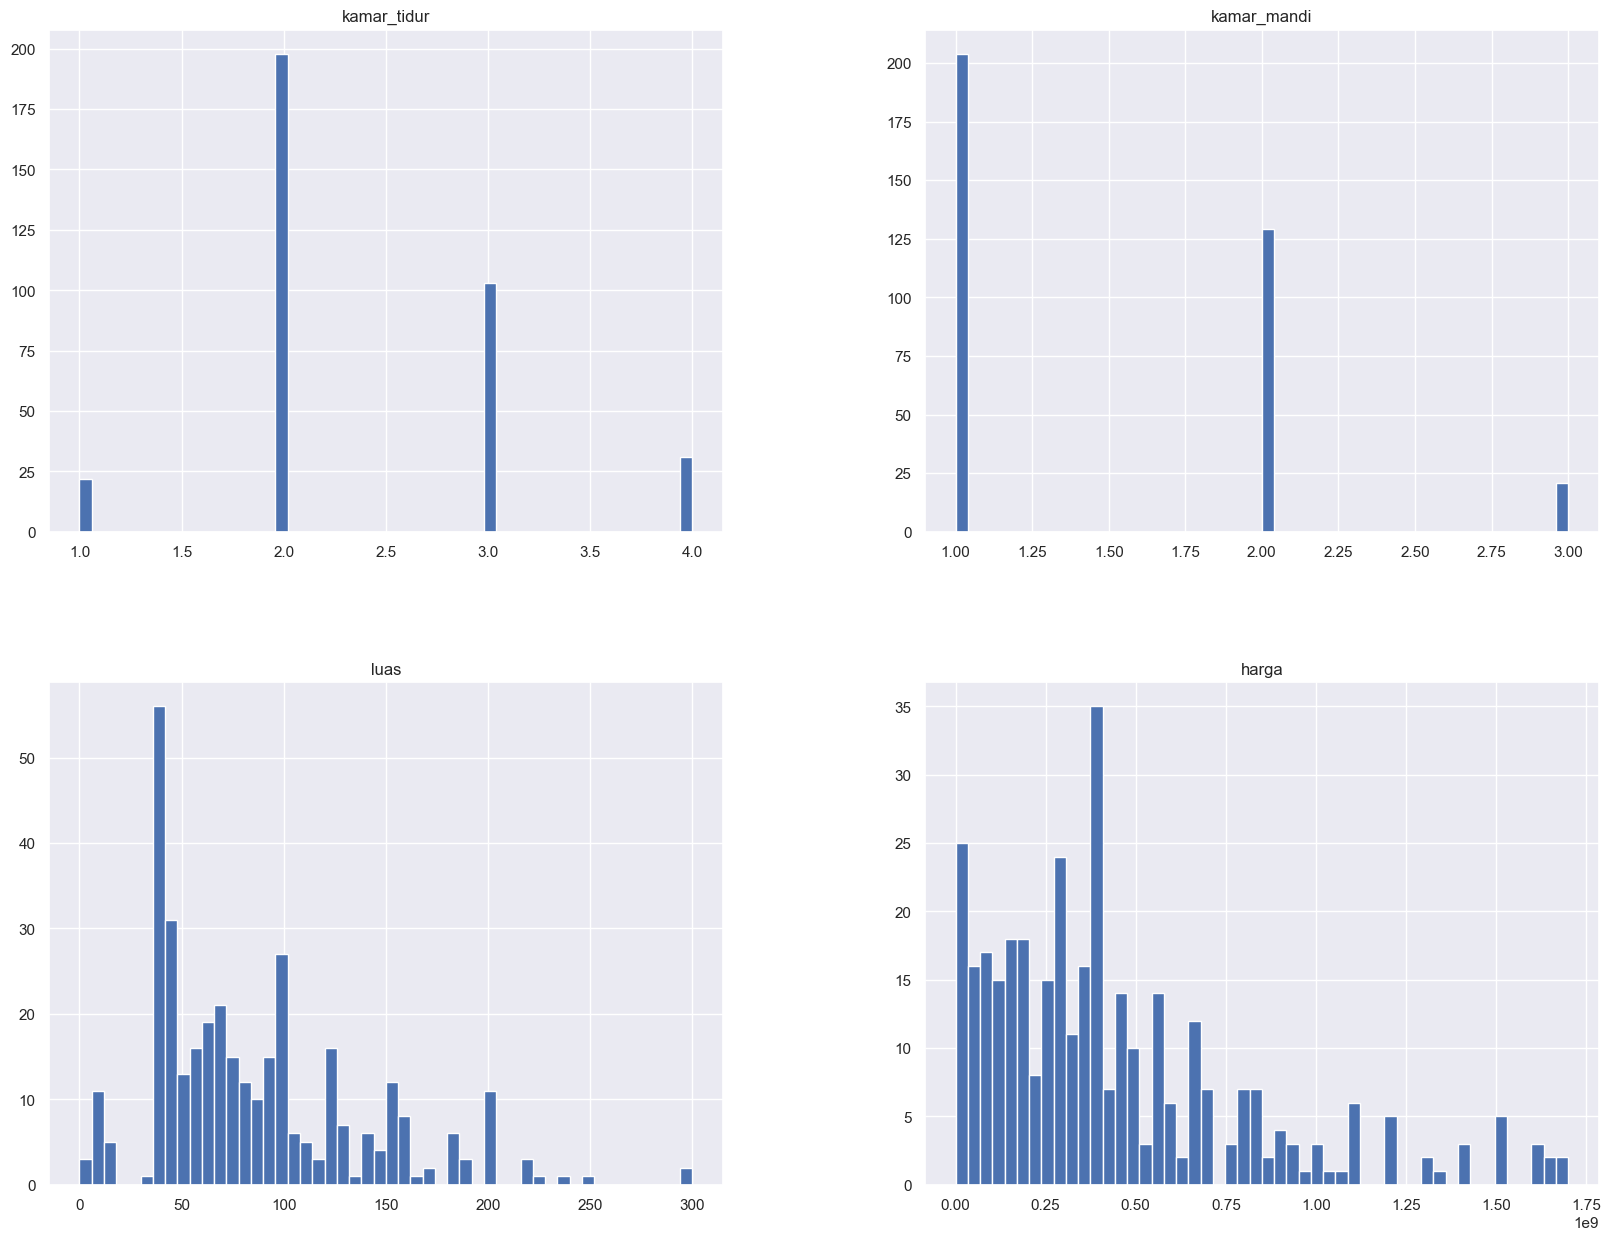

In [32]:
filtered_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [33]:
df.describe()

,kamar_tidur,kamar_mandi,luas,harga
count,433.00000,433.000000,433.000000,4.330000e+02
mean,2.73903,1.775982,129.487298,1.043889e+09
std,1.23370,1.081484,186.232781,5.463359e+09
min,1.00000,1.000000,0.000000,9.000000e+00
25%,2.00000,1.000000,48.000000,1.995000e+08
50%,2.00000,2.000000,88.000000,4.000000e+08
75%,3.00000,2.000000,150.000000,8.250000e+08
max,10.00000,9.000000,2020.000000,1.100000e+11


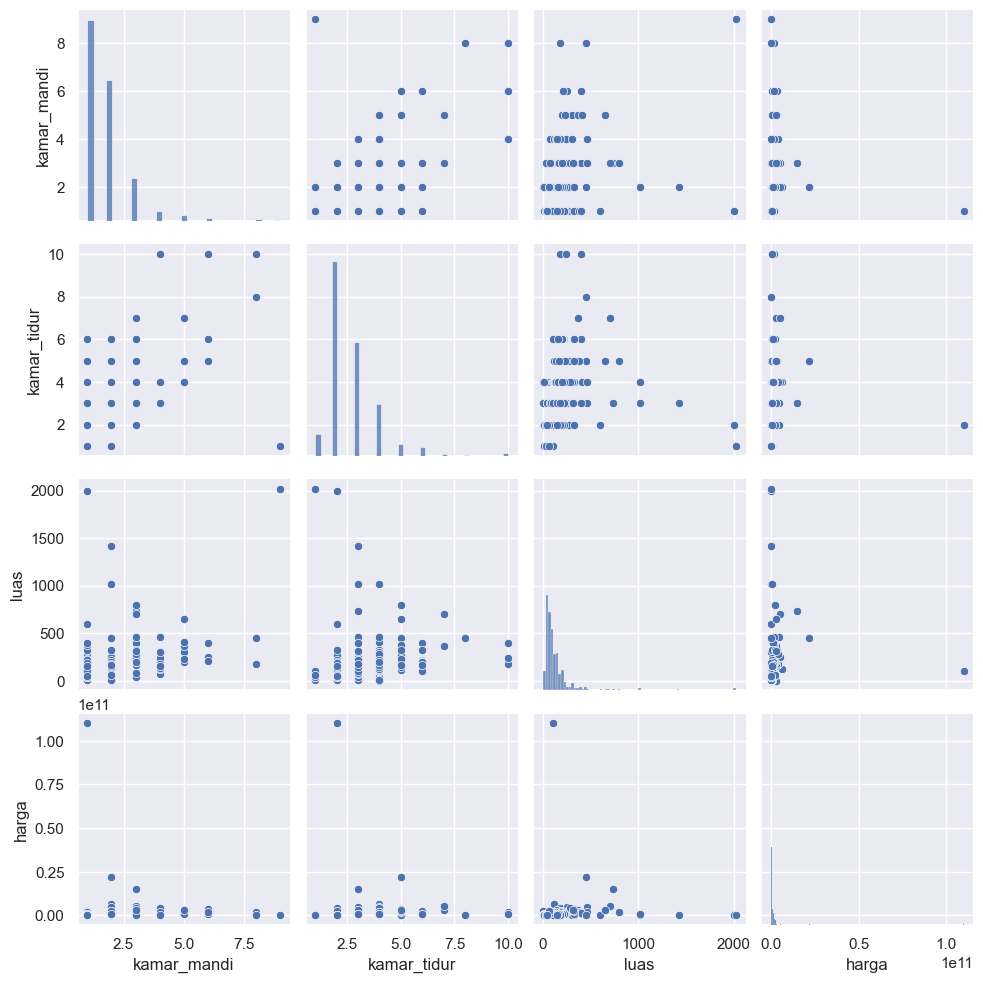

In [34]:
sns.pairplot(df,
             vars=['kamar_mandi', 'kamar_tidur', 'luas', 'harga'])
plt.show()

In [35]:
df_corr = df[['kamar_mandi', 'kamar_tidur', 'luas', 'harga']].corr()
df_corr

,kamar_mandi,kamar_tidur,luas,harga
kamar_mandi,1.000000,0.620567,0.429917,0.048642
kamar_tidur,0.620567,1.000000,0.280412,0.062915
luas,0.429917,0.280412,1.000000,0.067801
harga,0.048642,0.062915,0.067801,1.000000


<Axes: xlabel='harga', ylabel='Density'>

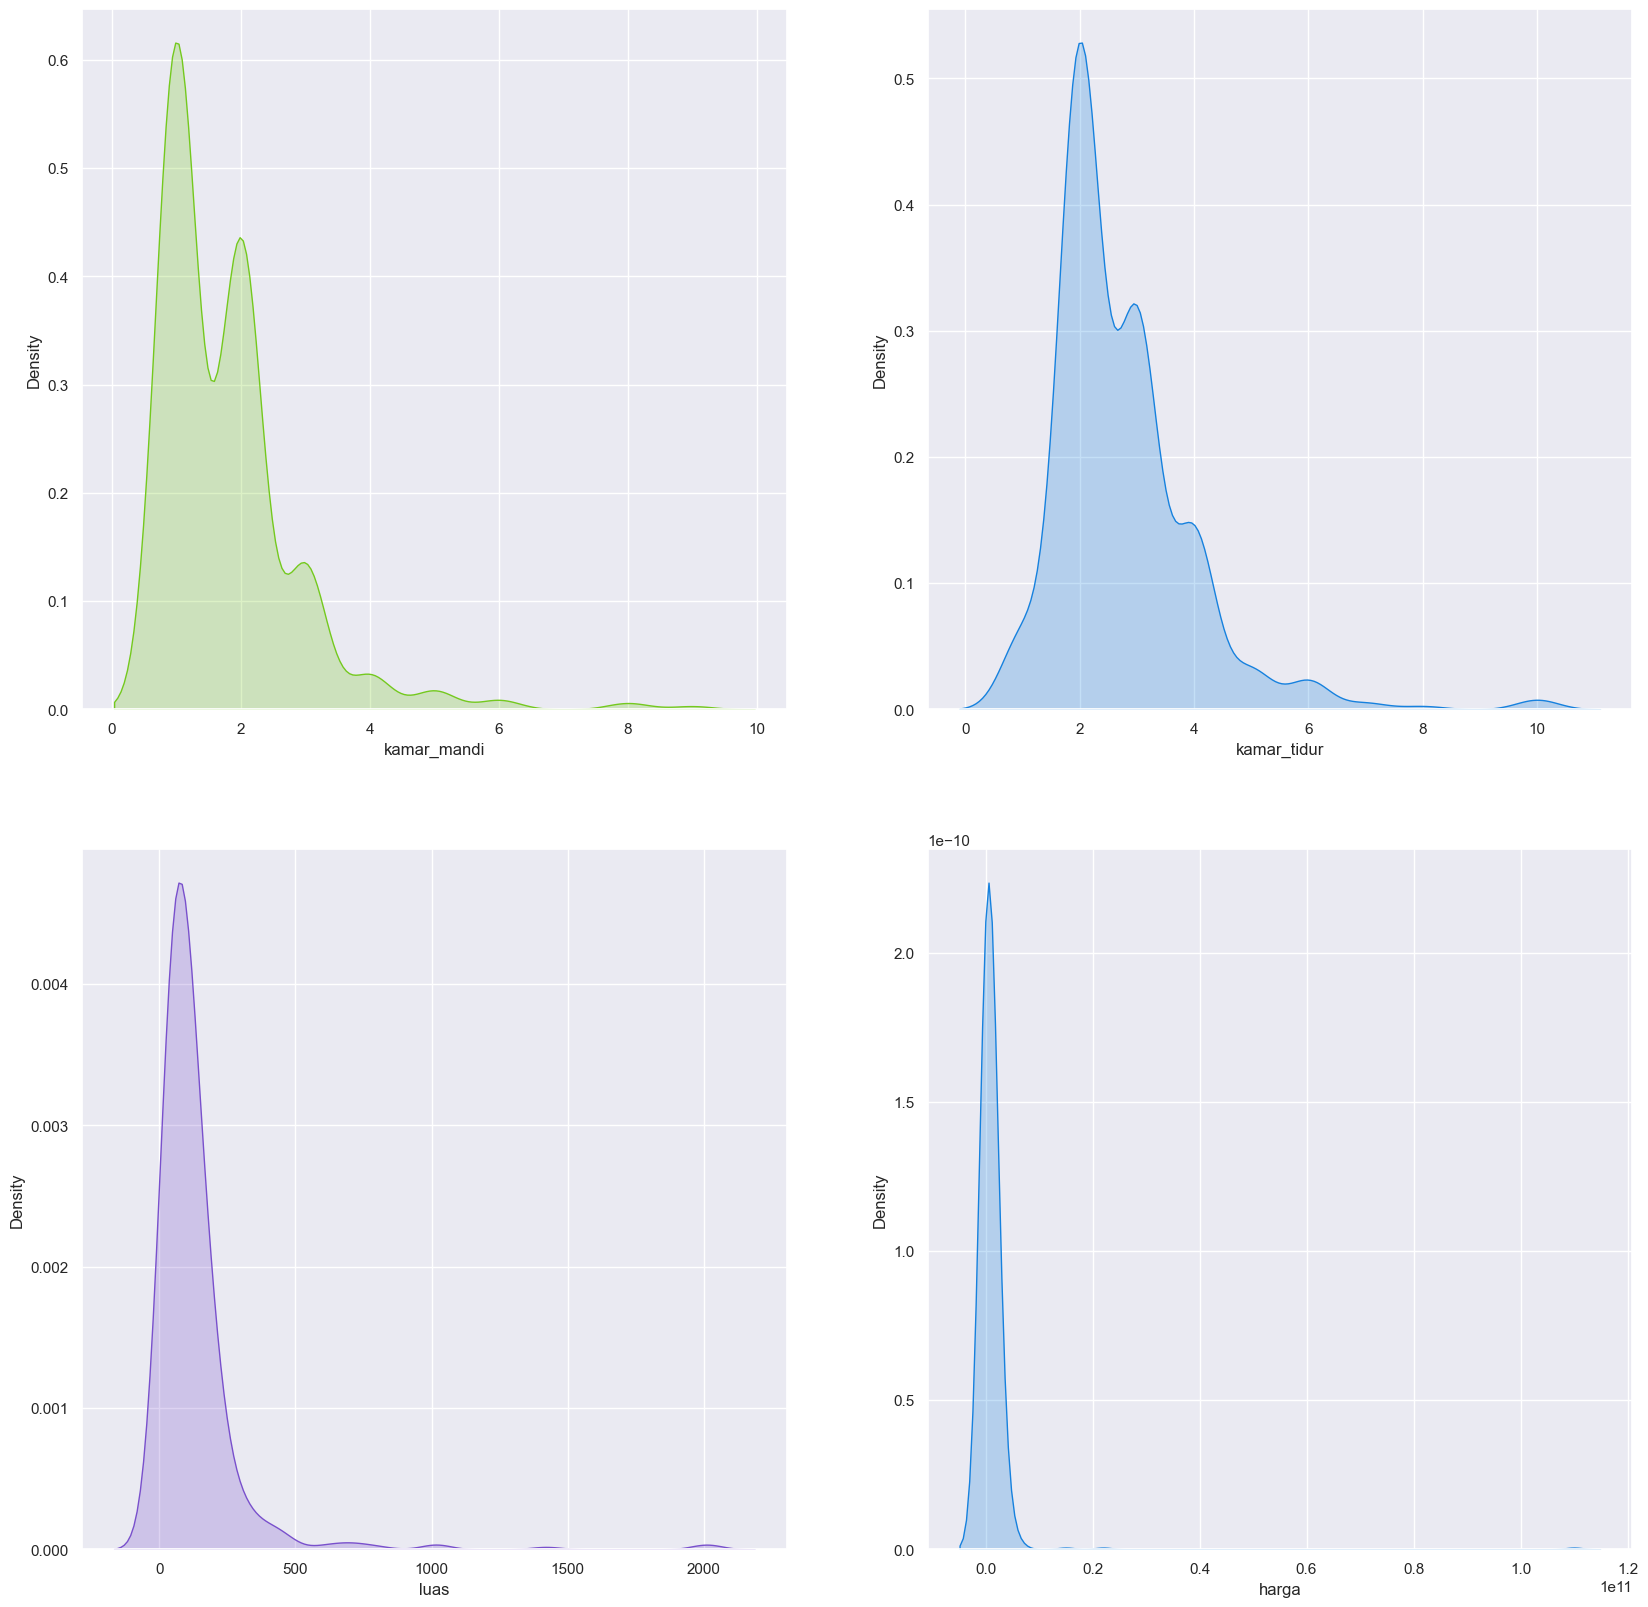

In [36]:
color_plot = ['#de972c','#74c91e','#1681de','#e069f5','#f54545','#f0ea46','#7950cc']

fig,ax = plt.subplots(2,2,figsize=(20,20))
sns.kdeplot(df['kamar_mandi'],color=np.random.choice(color_plot), ax=ax[0][0], fill=True)
sns.kdeplot(df['kamar_tidur'],color=np.random.choice(color_plot), ax=ax[0][1], fill=True)
sns.kdeplot(df['luas'],color=np.random.choice(color_plot), ax=ax[1][0], fill=True)
sns.kdeplot(df['harga'],color=np.random.choice(color_plot), ax=ax[1][1], fill=True)
#fig.delaxes(ax[2][0])